# Introduction
This project is based on the predictive modelling competition hosted on [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The project uses the [Ames Housing dataset](https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt).

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import skew, probplot, norm, lognorm

%matplotlib inline
pd.options.display.max_columns = 999

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

# Import the Dataset

In [2]:
# Import the training and testing data into a pandas Dataframe.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Print column names.
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# Print the first 5 rows of train.
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Print the first 5 rows of test.
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Print the number of rows and columns in train and test.
print('The training data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The training data has 1460 rows and 81 columns
The test data has 1459 rows and 80 columns


In [6]:
# The Id column is not required for modelling.
# Store the Id column.
train_id = train['Id']
test_id = test['Id']

# Eliminate the Id column.
train = train.drop(columns=['Id'])
test = test.drop(columns=['Id'])

print('After dropping the Id column:')
print('The training data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

After dropping the Id column:
The training data has 1460 rows and 80 columns
The test data has 1459 rows and 79 columns


# Data Preprocessing

## Outliers
The [documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt) for the Ames housing dataset indicate that there are a few outliers which can be explored by creating a scatter plot between 'SalePrice' and 'Gr Liv Area'.

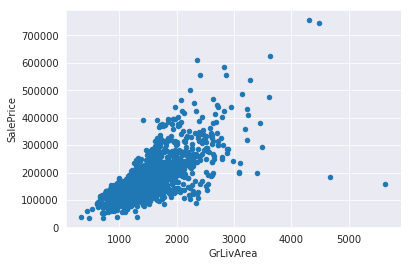

In [7]:
# Scatter plot between 'GrLivArea' and 'SalePrice'.
train.plot.scatter('GrLivArea', 'SalePrice')

We can see on the lower right corner that there are 2 houses with very high living area but low sale prices.
we can eliminate these data.

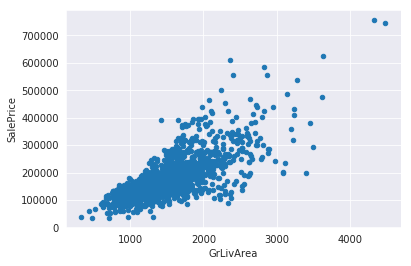

In [8]:
# Extract the indexes of the outlier points.
outliers = train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index

# Drop the outliers.
train = train.drop(index=outliers)

# Again plot the scatter plots.
train.plot.scatter('GrLivArea', 'SalePrice')

## Target Variable
**SalePrice** is the target variable. Lets analyze this variable.

/home/malhar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


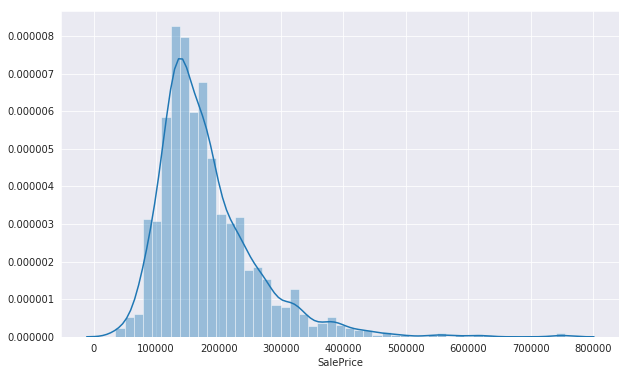

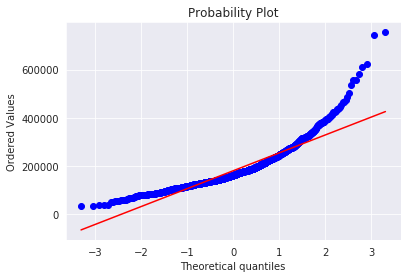

In [9]:
# Create a frequency distribution plot for SalePrice.
fig, axes = plt.subplots(figsize=(10,6))
sns.distplot(train['SalePrice'], ax=axes)
plt.show()

# Q-Q Plot
probplot(train['SalePrice'], plot=plt)
plt.show()

The **SalePrice** variable is **right skewed** in nature. Thus, we must **log-transform** it to make it more normally distributed.

/home/malhar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


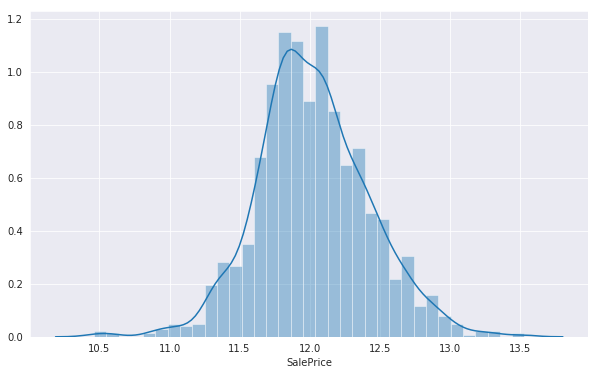

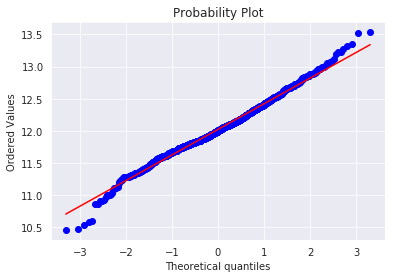

In [10]:
# Log transform SalePrice variable log(1+x).
train['SalePrice'] = np.log1p(train['SalePrice'])

# Again create a frequency distribution plot for SalePrice.
fig, axes = plt.subplots(figsize=(10,6))
sns.distplot(train['SalePrice'], ax=axes)
plt.show()

# Q-Q Plot
probplot(train['SalePrice'], plot=plt)
plt.show()

After log-transforming the SalePrice column, it looks more normally distributed.

# Feature Engineering

since feature engineering needs to be done on both train and test data, lets first concatenate them to make things easier.

In [11]:
# Save the number of rows in train and test.
ntrain = train.shape[0]
ntest = test.shape[0]

# Save the SalePrice column from train data.
y_train = train['SalePrice']

# Concatenate train and test.
all_data = pd.concat([train, test])
all_data = all_data.reset_index(drop=True)

# Drop the price column
all_data.drop(columns=['SalePrice'], inplace=True)

print('The size of the entire data is : {}'.format(all_data.shape))


The size of the entire data is : (2917, 79)


## Missing Data

In [12]:
# calculate the percentage of missing values in each column.
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na[all_data_na>0].sort_values(ascending=False)
missing_data = pd.DataFrame()
missing_data['missing_ratio'] = all_data_na
missing_data

,missing_ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


[Text(0,0.5,'percentage of missing values'), Text(0.5,0,'features')]

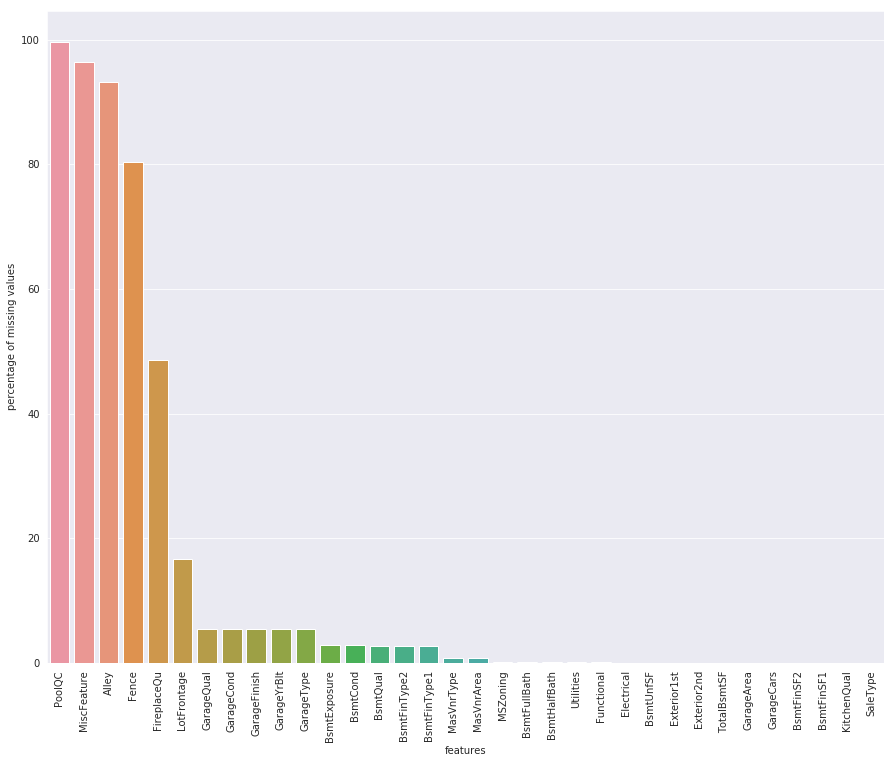

In [13]:
# Make a barplot for columns with missing values.
fig, axes = plt.subplots(figsize=(15,12))
sns.barplot(x=missing_data.index, y = missing_data['missing_ratio'],ax=axes)
plt.xticks(rotation=90)
axes.set(xlabel='features', ylabel='percentage of missing values')

## Data Correlation

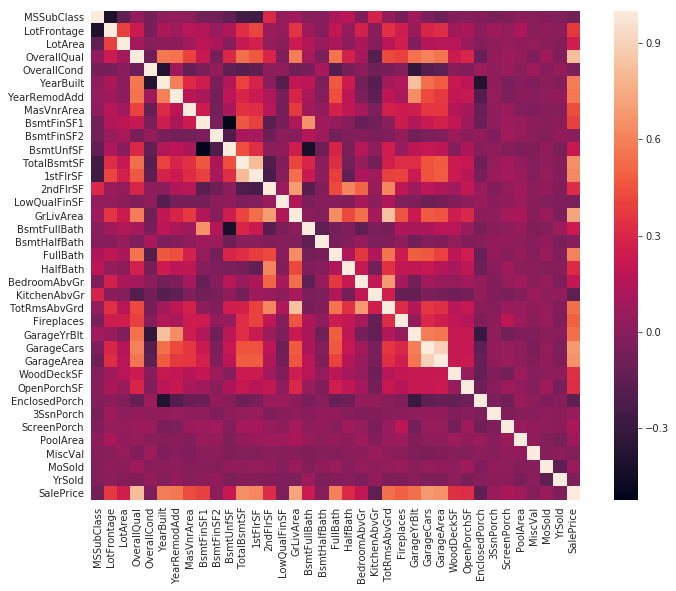

In [14]:
# Find the correlation of numerical variables with SalePrice column.
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True,ax=ax)

## Impute missing values

* **PoolQC** : null value means no pool.

In [15]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

* **MiscFeature** : null values means no misc features

In [16]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

* **Alley** : null values means no Alley access.

In [17]:
all_data['Alley'] = all_data['Alley'].fillna('None')

* **Fence** : null values means no fence.

In [18]:
all_data['Fence'] = all_data['Fence'].fillna('None')

* **FireplaceQu** : null values means no fireplaces.

In [19]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

* **LotFrontage** : This is the Linear feet of street connected to property.
The houses belonging to the same neighborhood will have similar LotFrontage. 
Missing values can be imputed using **median values of LotFrontage** of the corresponsing **Neighborhood**.

In [20]:
median_lotfrontage = pd.pivot_table(all_data, index='Neighborhood', 
                                    values='LotFrontage', aggfunc=np.median)['LotFrontage']

missing_index_lotfrontage = all_data[all_data['LotFrontage'].isnull()].index
for index in missing_index_lotfrontage:
    all_data.loc[index, 'LotFrontage'] = median_lotfrontage[all_data.loc[index, 'Neighborhood']]

   

* **GarageQual, GarageCond, GarageFinish, GarageType** : null value means that there is no garage.

In [21]:
for col in ['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']:
    all_data[col] = all_data[col].fillna('None')

* **GarageYrBlt, GarageArea, GarageCars** : Replace null values with 0.

In [22]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data[col] = all_data[col].fillna(0)

* **BsmtExposure, BsmtCond, BsmtQual, BsmtFinType2, BsmtFinType1** : null value means no basement.

In [23]:
for col in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    all_data[col] = all_data[col].fillna('None')

* **BsmtFullBath, BsmtHalfBath, BsmtUnfSF, TotalBsmtSF, BsmtFinSF2, BsmtFinSF1** : Replace null values with 0.

In [24]:
for col in ['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1']:
    all_data[col] = all_data[col].fillna(0)

* **MasVnrType** : null value mean no masonry.
* **MasVnrArea** : Replace null values with 0.

In [25]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

* **MSZoning** : Replace null values with the most common value in this column.

In [26]:
most_common = all_data['MSZoning'].mode()[0]
all_data['MSZoning'] = all_data['MSZoning'].fillna(most_common)

* **Utilities** : In this column all values are 'AllPub' except for one 'NoSewa'. Drop this column because it would not be of much help in modelling.

In [27]:
all_data = all_data.drop(columns=['Utilities'])

* **Functional** : data description says NA means typical

In [28]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

* **SaleType** : Replace null values with the most common value.

In [29]:
most_common = all_data['SaleType'].mode()[0]
all_data['SaleType'] = all_data['SaleType'].fillna(most_common)

* **KitchenQual** : Replace null values with the most common value.

In [30]:
most_common = all_data['KitchenQual'].mode()[0]
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(most_common)

* **Exterior1st, Exterior2nd** : Replace null values with the most common value.

In [31]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

* **Electrical** : Replace null values with the most common value. 

In [32]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

Check if any missing values are remaining.

In [33]:
# calculate the percentage of missing values in each column.
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na[all_data_na>0].sort_values(ascending=False)
missing_data = pd.DataFrame()
missing_data['missing_ratio'] = all_data_na
missing_data

,missing_ratio


The empty dataframe indicates no missing values.

In [34]:
print('After imputing missing values, the size of the data is : {}'.format(all_data.shape))

After imputing missing values, the size of the data is : (2917, 78)


## Transforming Some Numerical Features That Are Really Categorical

* **MSSubClass** : Map numerical values to categorical values.

In [35]:
all_data['MSSubClass'] = all_data['MSSubClass'].replace({20:'SC20', 30:'SC30', 40:'SC40', 45:'SC45', 
                                                        50:'SC50', 60:'SC60', 70:'SC70', 75:'SC75', 
                                                        80:'SC80', 85:'SC85', 90:'SC90', 120:'SC120', 
                                                        150:'SC150', 160:'SC160', 180:'SC180', 190:'SC190'})

* **MoSold**: Map numerical values to corresponding names of the month.

In [36]:
all_data['MoSold'] = all_data['MoSold'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                                                7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

## Label Encoding Ordinal Features

In [37]:
# Extract all ordinal columns.
cols = ['LotShape' ,'LandSlope' ,'ExterQual' ,'ExterCond' ,'BsmtQual' ,
        'BsmtCond' ,'BsmtExposure' ,'BsmtFinType1' ,'BsmtFinType2' ,
        'HeatingQC' ,'Electrical' ,'KitchenQual' ,'Functional', 'Street', 'Alley', 'CentralAir'
        ,'FireplaceQu' ,'GarageFinish' ,'GarageQual' ,'GarageCond' ,'PavedDrive' ,'PoolQC' ,'Fence']

for col in cols:
    all_data[col] = all_data[col].astype('category')
    all_data[col] = all_data[col].cat.codes
    
print('Size of the data is : {}'.format(all_data.shape))    

Size of the data is : (2917, 78)


## Creating  New Features

* **Let's create a new feature that represents a the total area of a house.**

In [38]:
all_data['Total_area'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

* **Also let's create a feature that represents the age of the house when it was sold.**

In [39]:
all_data['age_at_sale'] = all_data['YrSold'] - all_data['YearRemodAdd']

## Correct Skewed Features

* **Calculate the skew of numeric features.**

In [40]:
# Extract numeric columns.
numeric_features = all_data.select_dtypes(include=['number']).columns

# Calculate Skew for each numerical feature.
feature_skew = all_data[numeric_features].apply(lambda x : skew(x))
feature_skew = feature_skew.sort_values(ascending=False)

# Store feature_skew in a dataframe.
skewness = pd.DataFrame()
skewness['skew'] = feature_skew
skewness.head(10)

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


* **Identify and correct highly skewed features**.

In [41]:
# Identify highly skewed features.
skewness = skewness[skewness['skew']>0.75]
cols = skewness.index

#Take log(1+x) transformation of highly skewed features.
for col in cols:
    all_data[col] = np.log1p(all_data[col])

## One Hot Encode Rest of the Categorical Features

In [42]:
all_data = pd.get_dummies(all_data)
print('all_data shape : {}'.format(all_data.shape))

all_data shape : (2917, 243)


* **Get the new train and test sets.**

In [43]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modelling

In [44]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

* **In our cross-validation strategy we shall use the number of folds as 5.**

In [45]:
def rmsle_cv(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse = -cross_val_score(model,train, y_train, scoring="neg_mean_squared_error", cv=kf )
    rmse = mse ** 0.5
    return rmse

* **Simple Linear Regression**

In [46]:
linear_reg = LinearRegression()
score = rmsle_cv(linear_reg)
print('AVG RMSE : {}'.format(score.mean()))
print('STD RMSE : {}'.format(score.std()))

AVG RMSE : 0.1320435189486179
STD RMSE : 0.013075598989169511


* **Ridge Regression**

In [47]:
ridge_reg = make_pipeline(RobustScaler(), Ridge(alpha=0.954))
score = rmsle_cv(ridge_reg)
print('AVG RMSE : {}'.format(score.mean()))
print('STD RMSE : {}'.format(score.std()))

AVG RMSE : 0.11857954030809115
STD RMSE : 0.008226565522238221


* **Lasso Regression**

In [48]:
lasso_reg = make_pipeline(RobustScaler(), Lasso(alpha=0.0005))
score = rmsle_cv(lasso_reg)
print('AVG RMSE : {}'.format(score.mean()))
print('STD RMSE : {}'.format(score.std()))

AVG RMSE : 0.11160841041687057
STD RMSE : 0.007230046466765548


* **ElasticNet Regression**

In [49]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9))
score = rmsle_cv(ENet)
print('AVG RMSE : {}'.format(score.mean()))
print('STD RMSE : {}'.format(score.std()))

AVG RMSE : 0.11163173905262316
STD RMSE : 0.007293656429254148


# Make Final Prediction 

* ** Prediction based on Lasso Regression**.

In [50]:
lasso_reg.fit(train, y_train)
predictions = lasso_reg.predict(test)
final_predictions = np.expm1(predictions)
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = final_predictions
submission.to_csv('submission.csv',index=False)

* **Predictions based on ElasticNet.**

In [51]:
ENet.fit(train, y_train)
predictions = ENet.predict(test)
final_predictions = np.expm1(predictions)
submission1 = pd.DataFrame()
submission1['Id'] = test_id
submission1['SalePrice'] = final_predictions
submission1.to_csv('submission1.csv',index=False)